<a href="https://colab.research.google.com/github/KirPim/DS_school_2020_home_work/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D1%84%D0%B8%D0%BD%D0%B0%D0%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Загрузка датасета

In [ ]:
file = files.upload()

!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 11.9MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.5MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.2MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.0MB/s]


In [ ]:
!ls

data_description.txt  sample_data  sample_submission.csv  test.csv  train.csv


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Анализ и предварительная обработка данных

Выведем общую информацию о типах полей и количестве непустых значений.
Убираем колонку id, так как индекс уже присутствует в объекте DataFrame

In [ ]:
df.drop(columns=['Id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Выведем тепловую карту пустот для визуализации пустот

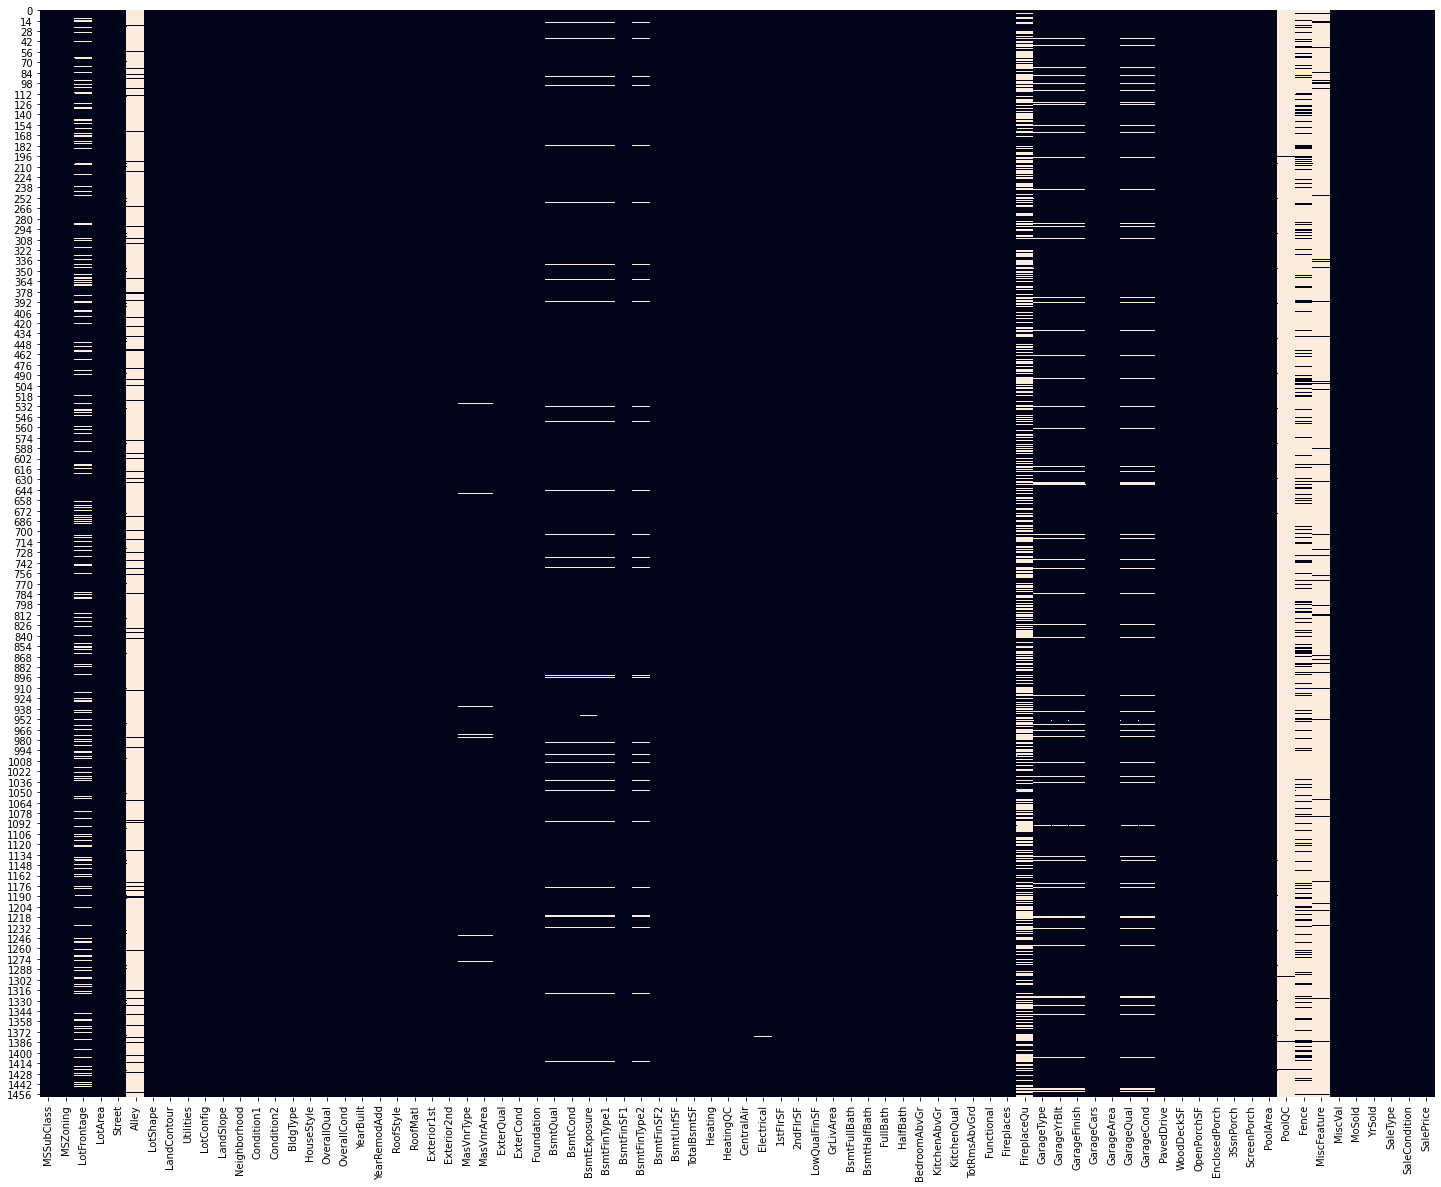

In [ ]:
from matplotlib.pyplot import figure

figure(figsize = (25, 20))
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Убираем поля, в которых очень много пропусков, так как они из-за этого не информативны

In [ ]:
columns_to_drop = ['Alley', 'PoolQC', 'MiscFeature', 'Fence']

In [ ]:
df.drop(columns = columns_to_drop, inplace=True)

Выведем количество уникальных значений для всех категориальных признаков, в которых имеются пропуски. Далее будем по ним заполнять пропуски отдельной категорией **None**

In [ ]:
columns_object_with_NA = []

for j in df.columns:
  if df.dtypes[j] == np.object and len(df[df[j].isnull()]) > 0:
    columns_object_with_NA.append(j)    
    print(df[j].value_counts(),'\n')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64 

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64 

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64 

TA    1326
F

In [ ]:
columns_object_with_NA

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

Для категориальных полей заполняем пустые значения значением **None** и удаляем строки с оставшимися пустотами

In [ ]:
df[columns_object_with_NA] = df[columns_object_with_NA].fillna(value='None')
df.dropna(inplace=True)

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Полчили в итоге датасет без пустых значений, в котором на 339 наблюдщений меньше, чем в исхоном, но все равно вполне достаточно для построения моделей

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1121 non-null   int64  
 1   MSZoning       1121 non-null   object 
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   Street         1121 non-null   object 
 5   LotShape       1121 non-null   object 
 6   LandContour    1121 non-null   object 
 7   Utilities      1121 non-null   object 
 8   LotConfig      1121 non-null   object 
 9   LandSlope      1121 non-null   object 
 10  Neighborhood   1121 non-null   object 
 11  Condition1     1121 non-null   object 
 12  Condition2     1121 non-null   object 
 13  BldgType       1121 non-null   object 
 14  HouseStyle     1121 non-null   object 
 15  OverallQual    1121 non-null   int64  
 16  OverallCond    1121 non-null   int64  
 17  YearBuilt      1121 non-null   int64  
 18  YearRemo

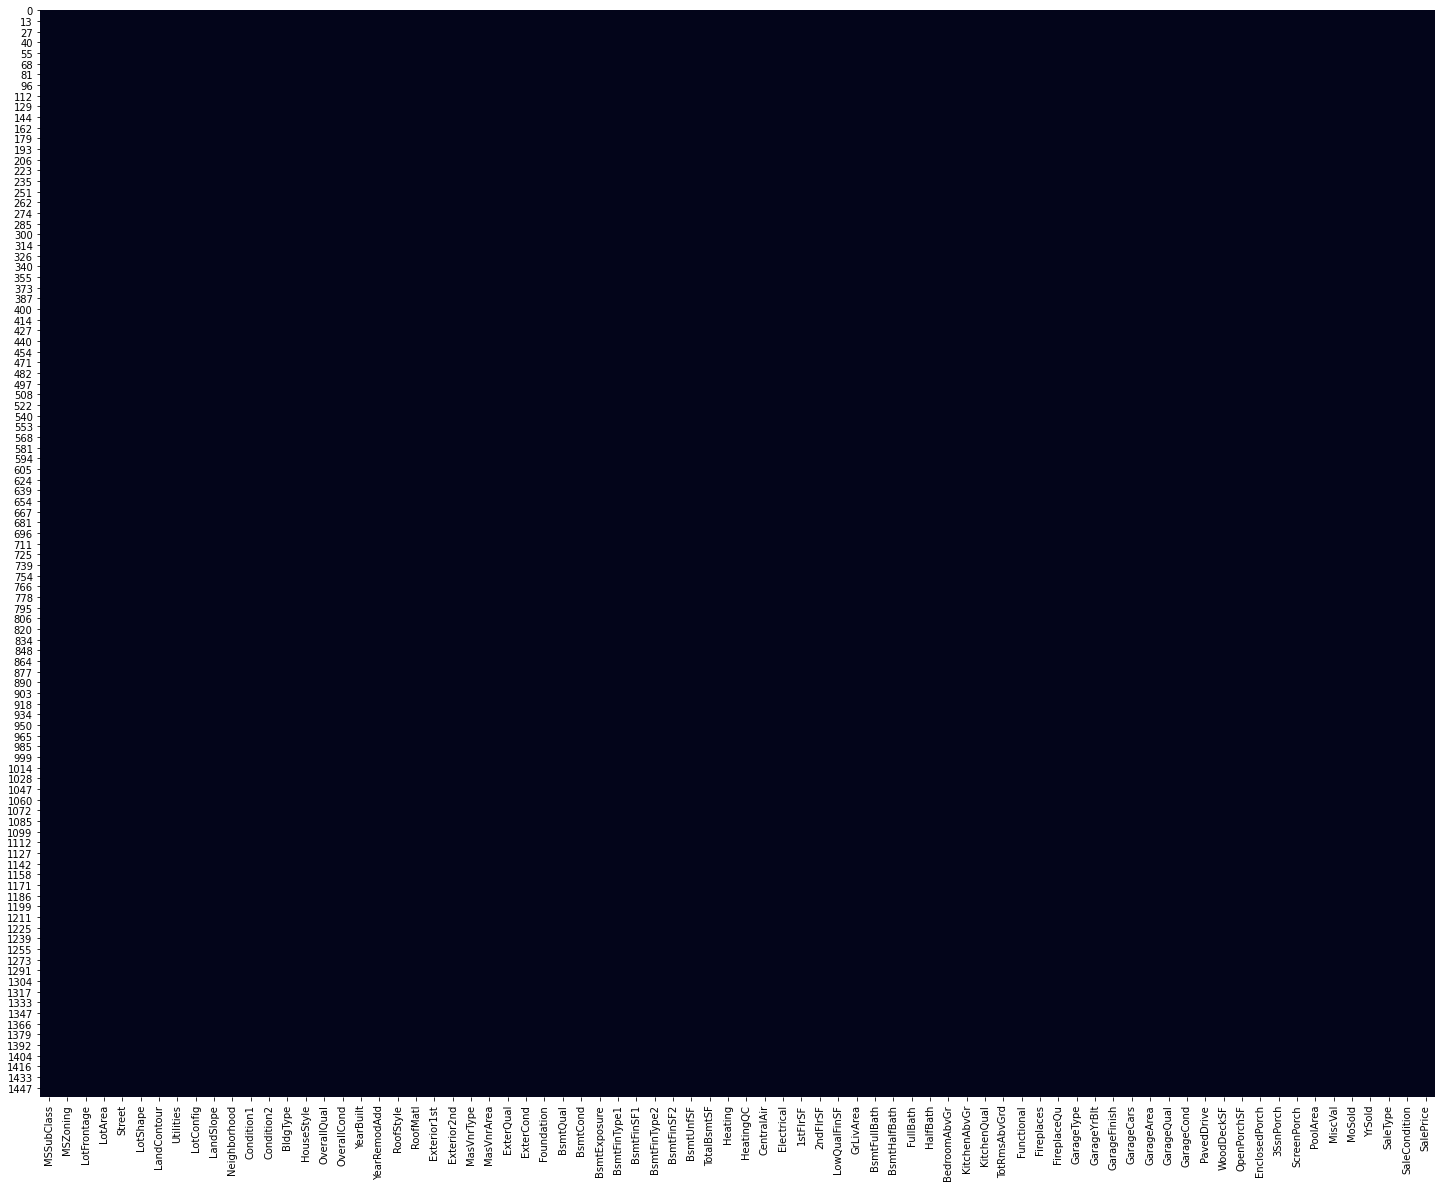

In [ ]:
figure(figsize = (25, 20))
sns.heatmap(df.isnull(), cbar=False)

Кодируем категориальные признаки через LabelEncoder

In [ ]:
from sklearn import preprocessing

def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [ ]:
encoded_data, encoders = number_encode_features(df)    
encoded_data.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,11,13,1,196.0,2,3,2,2,4,3,2,706,6,0,150,856,0,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,5,0,3,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,7,8,2,0.0,3,3,1,2,4,1,0,978,6,0,284,1262,0,0,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,5,1,5,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,11,13,1,162.0,2,3,2,2,4,2,2,486,6,0,434,920,0,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,5,1,5,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,12,15,2,0.0,3,3,0,4,1,3,0,216,6,0,540,756,0,2,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,5,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,11,13,1,350.0,2,3,2,2,4,0,2,655,6,0,490,1145,0,0,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,5,1,5,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [ ]:
df[encoders.keys()].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


Выводим распределения значений признаков для количественных признаков

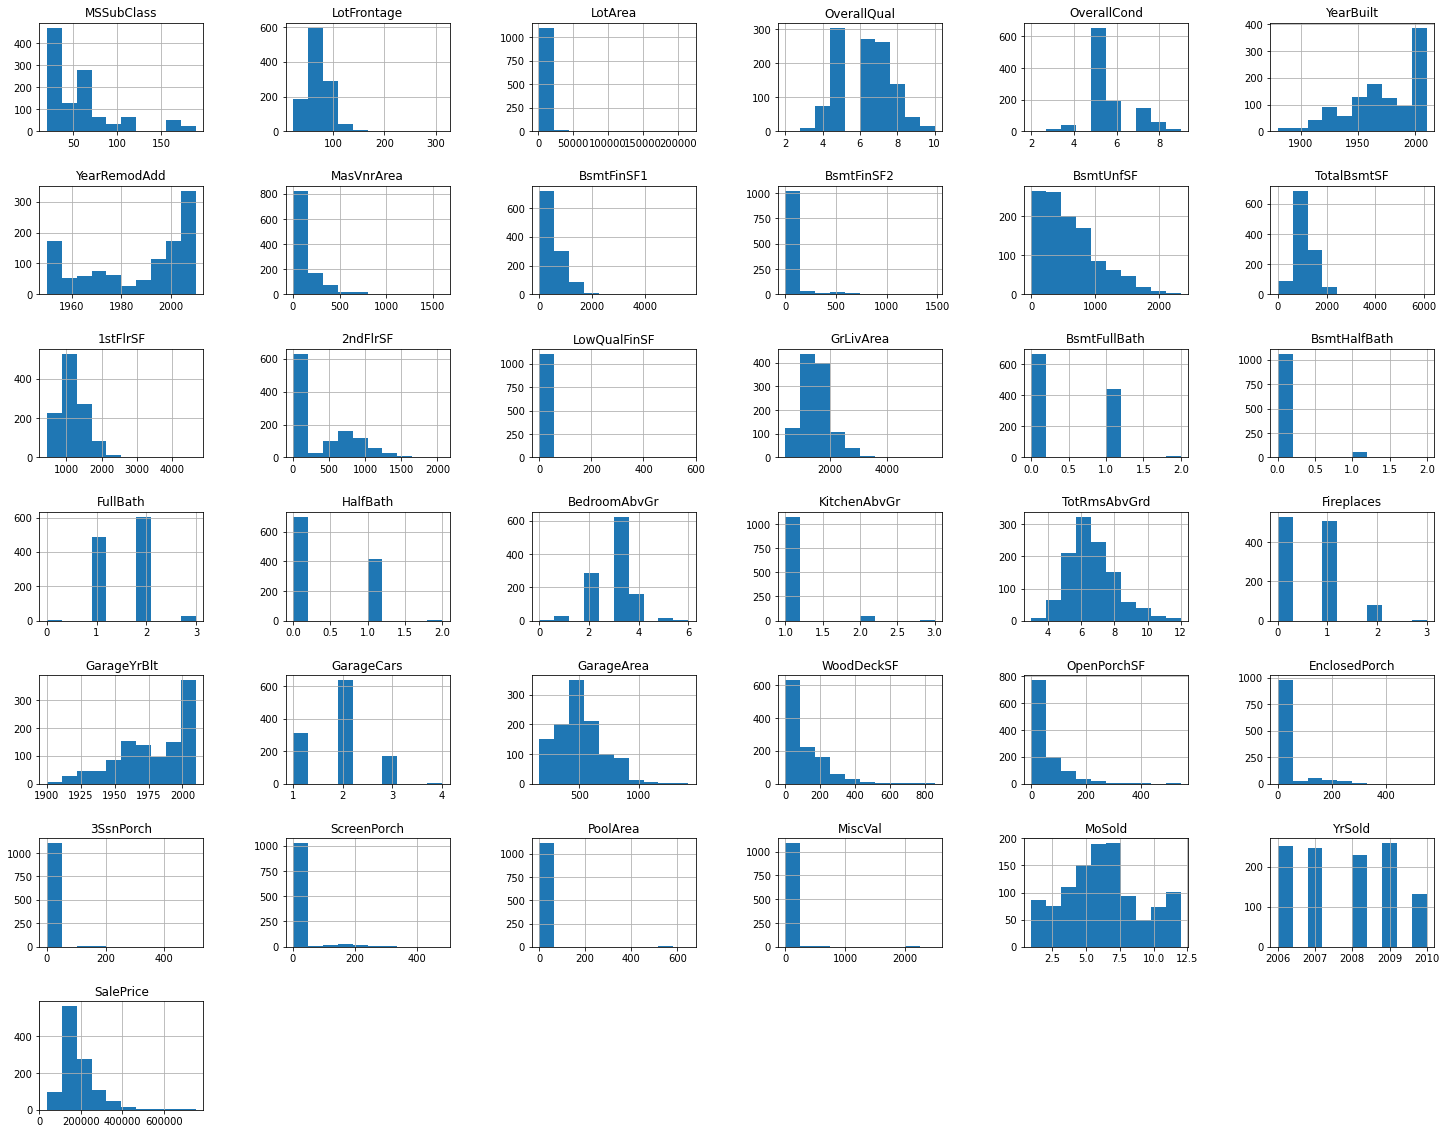

In [ ]:
df.hist(figsize = (25,20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

Выводим распределения значений признаков для категориальных закодированных признаков

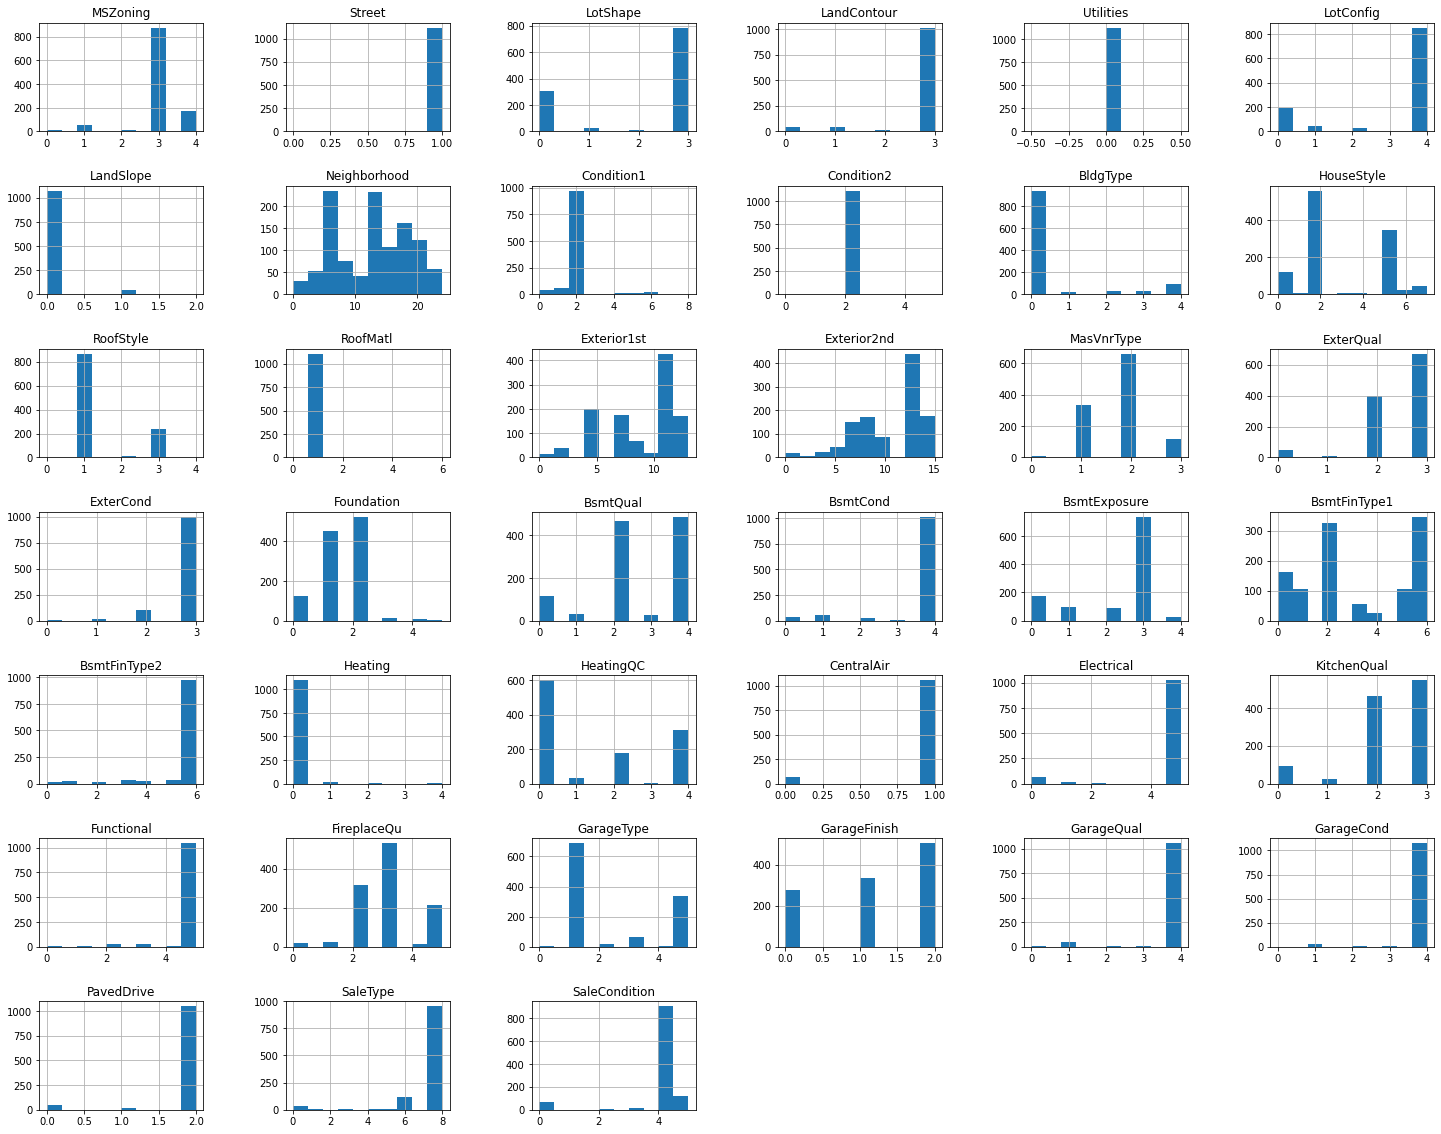

In [ ]:
encoded_data[encoders.keys()].hist(figsize = (25,20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

Рассмотрим более детально признаки, где яроко выражено единственное значение (предполагаем, что могут не оказывать влияния на цеелвую переменную)

In [ ]:
colums_to_view = ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl']

for j in colums_to_view:
  print(df[j].value_counts(),'\n')

Pave    1117
Grvl       4
Name: Street, dtype: int64 

AllPub    1121
Name: Utilities, dtype: int64 

Gtl    1072
Mod      44
Sev       5
Name: LandSlope, dtype: int64 

Norm      1109
Feedr        5
RRNn         2
Artery       2
PosN         2
PosA         1
Name: Condition2, dtype: int64 

CompShg    1104
Tar&Grv       6
WdShngl       6
WdShake       2
Membran       1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64 



Реализуем через функцию более детальное рассмотрение распределение наиболее сомнительных количественных признаков. Зададим также возможность ограничивать диапазон значений, чтобы рассмотреть более детально значения в узком диапазоне

In [ ]:
def column_detailed_analys(df, column, max_val=1e6):
  df[column][df[column] <= max_val].hist()
  plt.title(column)
  plt.show()
  print(df[column][df[column] <= max_val].value_counts())

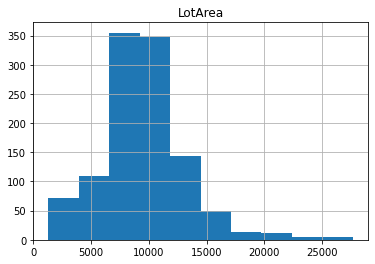

7200     25
9600     23
6000     16
8400     14
9000     12
         ..
5381      1
13568     1
15863     1
15611     1
11287     1
Name: LotArea, Length: 804, dtype: int64


In [ ]:
column_detailed_analys(encoded_data, column='LotArea', max_val=30000)

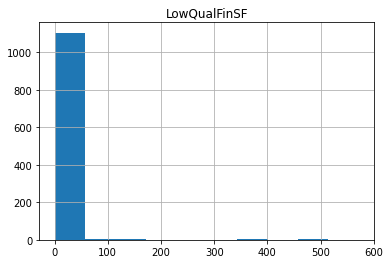

0      1104
80        3
360       2
572       1
481       1
473       1
420       1
397       1
392       1
390       1
384       1
232       1
156       1
144       1
120       1
Name: LowQualFinSF, dtype: int64


In [ ]:
column_detailed_analys(encoded_data, column='LowQualFinSF')

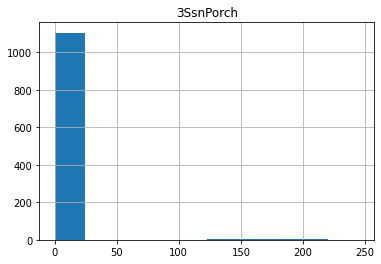

0      1103
180       2
168       2
144       2
245       1
216       1
196       1
162       1
153       1
140       1
96        1
23        1
Name: 3SsnPorch, dtype: int64


In [ ]:
column_detailed_analys(encoded_data, column='3SsnPorch', max_val=300)

По результатам анализа наблюдаем у ряда признаков большое сосредоточение наблюдений на конкретном значений. Но в итоге решено исключить признаки с наименьшей вариативностью (2 признака)

In [ ]:
encoded_data.drop(columns = ['Street', 'Utilities'], inplace=True)

Рассмотрим корреляционную матрицу по всем оставшимся признакам, включая целевую переменную **SalePrice**
Наблюдаем ряд сильных линейных зависимостей (прямых и обратных)

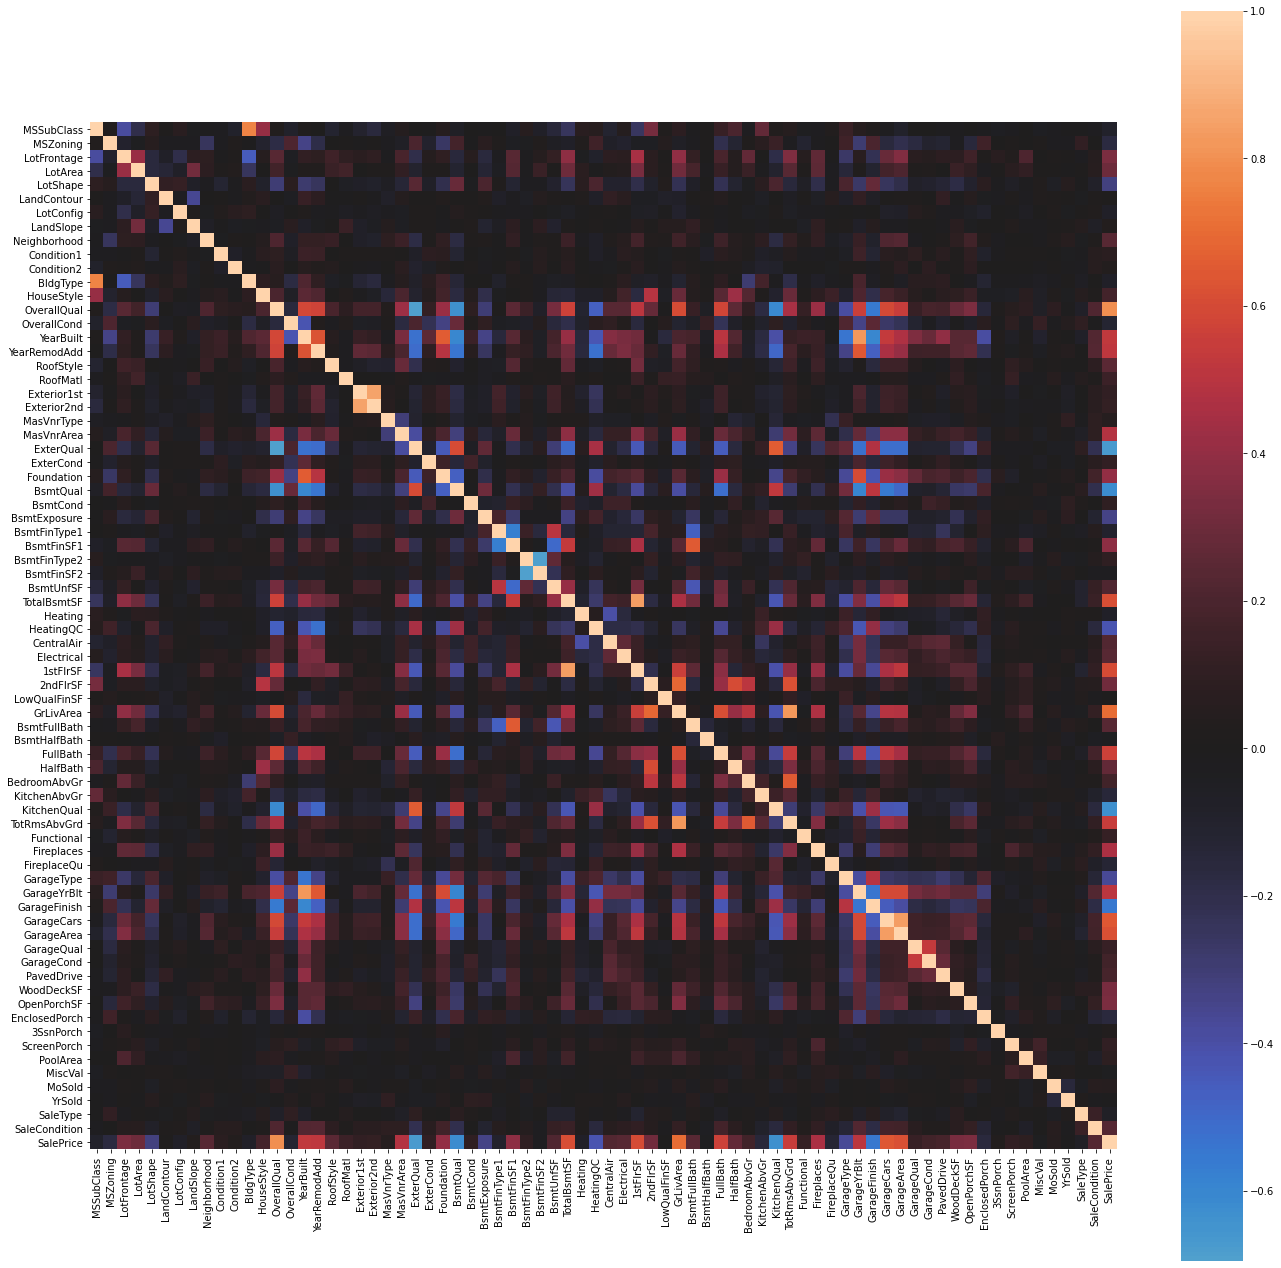

In [ ]:
plt.subplots(figsize=(23,23))
sns.heatmap(encoded_data.corr(), square=True, annot=False, center=0)
plt.show()

Рассмотрим более детально корреляции признаков, по которым замечены высокие по модулю коэффициенты корреляции. Выведем для этого дополнительную корреляционную матрицу (со значениями) по заданным признакам

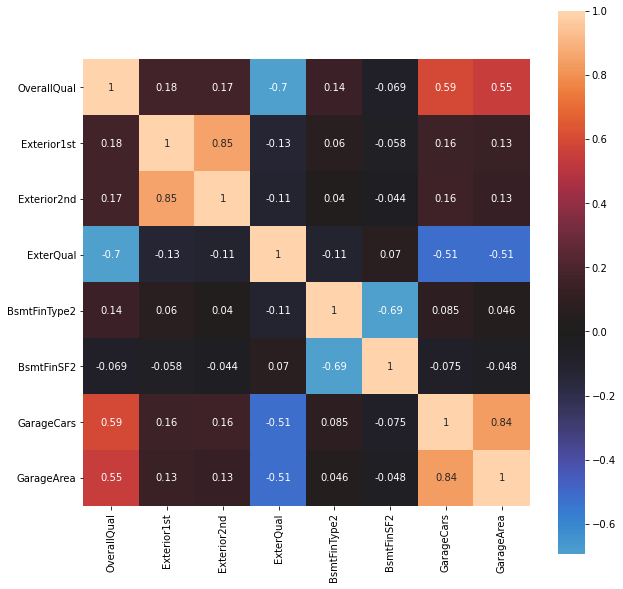

In [ ]:
columns_corr_analys = ['OverallQual', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'BsmtFinType2', 'BsmtFinSF2', 'GarageCars', 'GarageArea']
plt.subplots(figsize=(10,10))
sns.heatmap(encoded_data[columns_corr_analys].corr(), square=True, annot=True, center=0)
plt.show()

Принято рещение исключить по одному признаку в каждой сильнокоррелирующей паре. При выборе признака из пары также принималось во внимание зависимость этого признака с другими признаками (с наиболее сильной зависимостью исключались)

In [ ]:
encoded_data.drop(columns = ['OverallQual', 'Exterior1st', 'BsmtFinType2', 'GarageCars'], inplace=True)

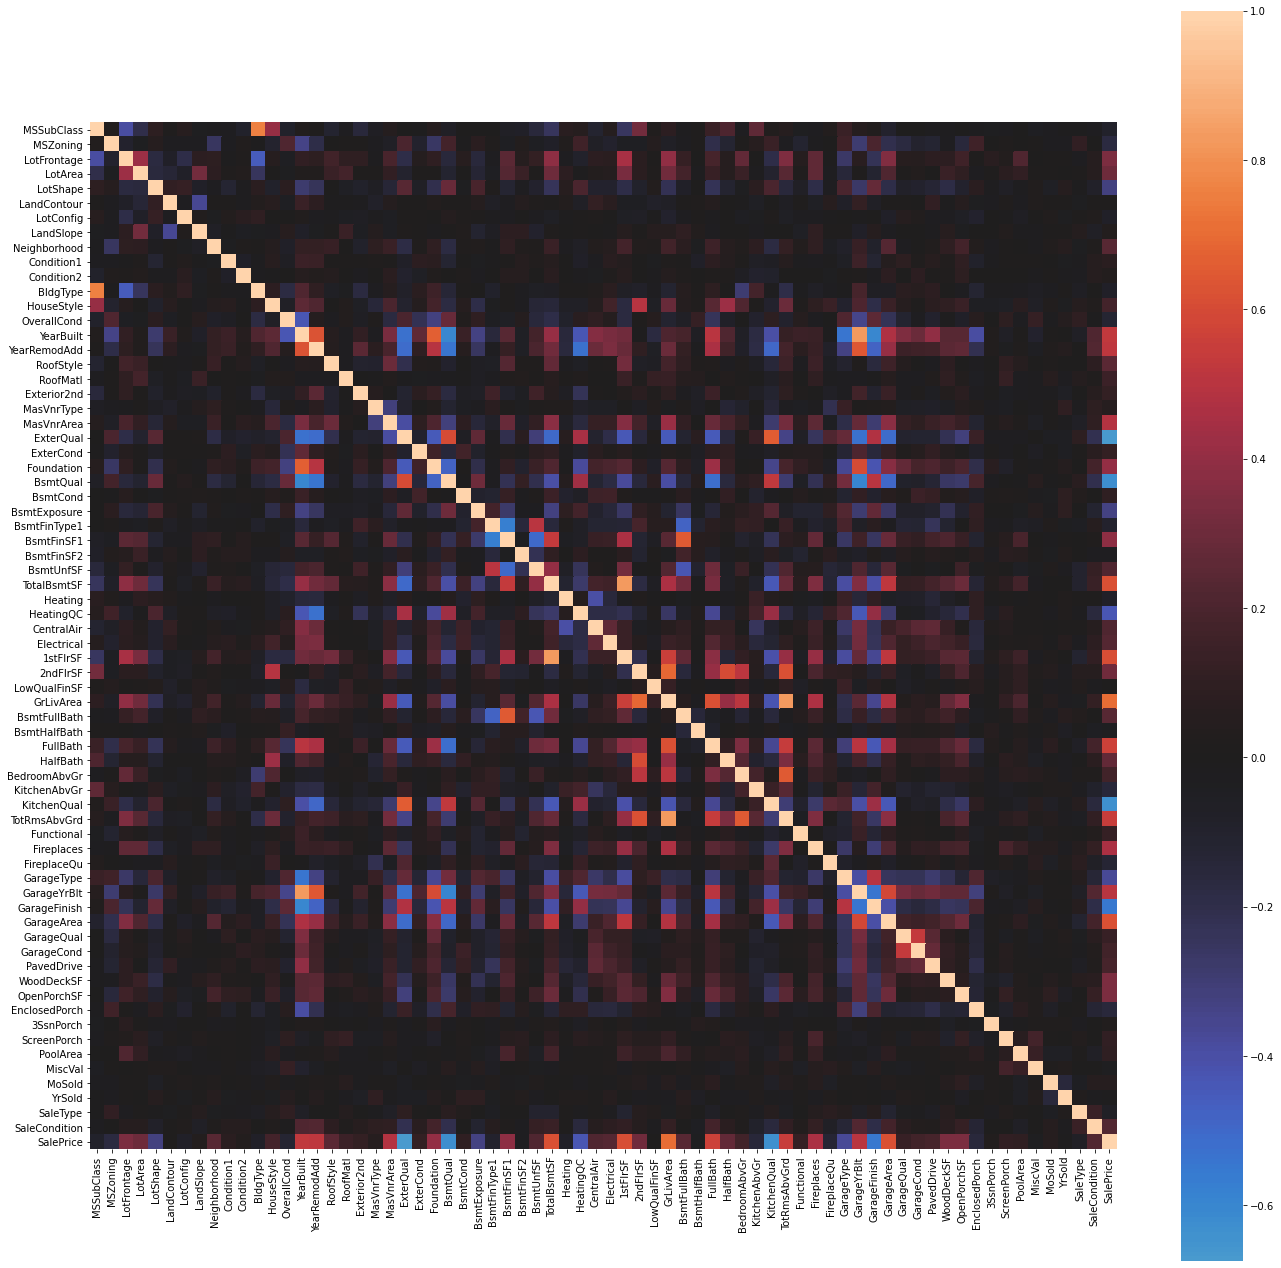

In [ ]:
plt.subplots(figsize=(23,23))
sns.heatmap(encoded_data.corr(), square=True, annot=False, center=0)
plt.show()

В итоге, после всех исключений осталось 69 признаков из 79.

In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1121 non-null   int64  
 1   MSZoning       1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   LotShape       1121 non-null   int64  
 5   LandContour    1121 non-null   int64  
 6   LotConfig      1121 non-null   int64  
 7   LandSlope      1121 non-null   int64  
 8   Neighborhood   1121 non-null   int64  
 9   Condition1     1121 non-null   int64  
 10  Condition2     1121 non-null   int64  
 11  BldgType       1121 non-null   int64  
 12  HouseStyle     1121 non-null   int64  
 13  OverallCond    1121 non-null   int64  
 14  YearBuilt      1121 non-null   int64  
 15  YearRemodAdd   1121 non-null   int64  
 16  RoofStyle      1121 non-null   int64  
 17  RoofMatl       1121 non-null   int64  
 18  Exterior

Выведем основные числовые характеристики получившегося датасета

In [ ]:
encoded_data.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.00000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.00000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,56.146298,3.029438,70.665477,10122.956289,2.136485,2.782337,3.147190,0.048171,12.432649,2.028546,2.001784,0.495094,3.009813,5.561106,1972.264942,1985.683318,1.43711,1.051740,10.439786,1.793042,108.487957,2.509367,2.871543,1.407672,2.658341,3.691347,2.304193,3.222123,438.399643,44.589652,594.125781,1077.115076,0.032114,1.456735,0.94380,4.608385,1173.584300,353.258698,4.568243,1531.411240,0.413916,0.055308,1.580731,0.381802,2.864407,1.042819,2.305977,6.576271,4.819804,0.603925,3.012489,2.359500,1978.399643,1.201606,502.955397,3.843889,3.892953,1.888492,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,7.479929,3.818020,185506.152542
std,41.772684,0.649195,24.266812,8129.302641,1.337014,0.707669,1.565451,0.234137,6.045007,0.896962,0.188974,1.210159,1.891922,1.068236,30.967730,21.025974,0.84082,0.461944,3.543629,0.626773,189.500966,0.713487,0.391314,0.734783,1.324948,0.956746,1.166983,2.255092,468.385038,157.828725,450.259657,445.656500,0.268667,1.728994,0.23041,1.309676,386.174253,438.561788,41.595469,523.723899,0.512298,0.232554,0.550117,0.498738,0.771935,0.206900,0.859843,1.591195,0.737757,0.632556,1.147912,1.822508,25.822833,0.811985,191.243043,0.655799,0.545398,0.436158,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,1.556036,1.069411,82999.159004
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1880.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,35311.000000
25%,20.000000,3.000000,60.000000,7590.000000,0.000000,3.000000,4.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,5.000000,1953.000000,1966.000000,1.00000,1.000000,8.000000,1.000000,0.000000,2.000000,3.000000,1.000000,2.000000,4.000000,2.000000,2.000000,0.000000,0.000000,250.000000,803.000000,0.000000,0.000000,1.00000,5.000000,894.000000,0.000000,0.000000,1155.000000,0.0

#Подбор алгоритмов и обучение моделей

Поскольку у нас задача предсказания цены SalePrice, которая является по сути непрерывной величиной, то будет решаться задача регрессии

Импортируем ряд моделей и методов из библиотеки sklearn, которые помогут нам решить задачу регрессии

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn import metrics

Определяем целевую переменную y и матрицу признаков X;
производим нормализацию признаков;
делаем разбивку выборки на тренировочную и тестовую в соотношении 80/20

In [ ]:
X = encoded_data.drop(['SalePrice'], axis=1)
y = encoded_data['SalePrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

Проверим, как работают некоторые алгоритмы с дефолтными параметрами.
Критериями оценнки будет служить коэффициент детерминации **R2** и справочно выведем **MAE**

### Линейная регрессия

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('R^2: %.4f' % (metrics.r2_score(y_test, y_pred)))
print('MAE: %.2f' % (metrics.mean_absolute_error(y_test, y_pred)))


R^2: 0.7372
MAE: 23875.01


### Линейная регрессия Elasticnet (комбинация L1 и L2 регуляризации)

In [ ]:
reg_el = ElasticNet()
reg_el.fit(X_train, y_train)

y_pred = reg_el.predict(X_test)

print('R^2: %.4f' % (metrics.r2_score(y_test, y_pred)))
print('MAE: %.2f' % (metrics.mean_absolute_error(y_test, y_pred)))

R^2: 0.7862
MAE: 21312.96


### Случайный лес для задачи регрессии

In [ ]:
rf_reg = RandomForestRegressor(random_state=123)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

print('R^2: %.4f' % (metrics.r2_score(y_test, y_pred)))
print('MAE: %.2f' % (metrics.mean_absolute_error(y_test, y_pred)))

R^2: 0.8343
MAE: 16614.63


### Градиентный бустинг для задачи регрессии

In [ ]:
gbr = GradientBoostingRegressor(random_state=123)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

print('R^2: %.4f' % (metrics.r2_score(y_test, y_pred)))
print('MAE: %.2f' % (metrics.mean_absolute_error(y_test, y_pred)))

R^2: 0.8180
MAE: 17239.86


По экспресс-оценке алгоритмов видим, что для данной тренировочной выборки лучший результат показал **Случайный лес**.

Теперь попробуем подобрать некоторые параметры для моделей ElasticNet, RandomForestRegressor, GradientBoostingRegressor через инструмент **GridsearchCV**.
Обучать GS для получения оптимальных параметров будем на полном наборе нормированных данных (поскольку уже и так используется кросс-валидация)

### GS: Линейная регрессия Elasticnet

In [ ]:
param_grid = {
    'alpha': np.linspace(0, 20, 100),
    'l1_ratio': np.linspace(0, 1, 25)
    }

gs_el = GridSearchCV(ElasticNet(), param_grid, cv=10, verbose=2, n_jobs=-1)
gs_el.fit(X_scaled, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print()
gs_el.best_params_, gs_el.best_score_

Fitting 10 folds for each of 2500 candidates, totalling 25000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 1650 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 6178 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 12018 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 19138 tasks      | elapsed:  2.6min


[Parallel(n_jobs=-1)]: Done 25000 out of 25000 | elapsed:  3.3min finished


({'alpha': 9.494949494949495, 'l1_ratio': 0.9583333333333333},
 0.8000328875344239)

Видим, что оптимальный параметр l1_ratio посчитался близким к 1, что говорит о том, что регуляризация смещена в сторону Lasso, т.е. имеет место зануление влияния части признаков, что довольно полезно при большом их множетве 

Обучим модель на оптимальных параметрах из GS.
Выведем результат R^2 для тренировочной выборки (Train), средний R^2 кросс-валидации на всей выборке (совпадает с результатом GS), результат R^2 для тестовой выборки (Test).
Поскольку результат Train близок к Test, считаем, что переобучения не произошло. 

Результат на тестовой выборке 0.7826 получился немного ниже, чем для модели в дефолтными параметрами 0.7862, что говорит о том, что для нашей исходной разбивки Train/Test параметры из GS неоптимальны, однако, для данных в целом это может быть лучшим результатом.

In [ ]:
reg_el = ElasticNet(**gs_el.best_params_)
reg_el.fit(X_train, y_train)
#print(metrics.r2_score(y_test, reg_el.predict(X_test)))

reg_el_train_score = reg_el.score(X_train, y_train)
reg_el_valid_score = np.mean(cross_val_score(reg_el, X_scaled, y, cv=10))
reg_el_test_score = reg_el.score(X_test, y_test)

print('ElasticNet \n',
      f'Train: {reg_el_train_score}\n',
      f'Valid: {reg_el_valid_score}\n',
      f'Test: {reg_el_test_score}'
      )
print('MAE: %.2f' % (metrics.mean_absolute_error(y_test, reg_el.predict(X_test))))

ElasticNet 
 Train: 0.827601183919152
 Valid: 0.8000328875344239
 Test: 0.7826538825582507
MAE: 21528.31


Посмотрим, как выглядит влияние признаков на целевую переменную

Text(0.5, 1.0, 'Коэффициенты регрессии')

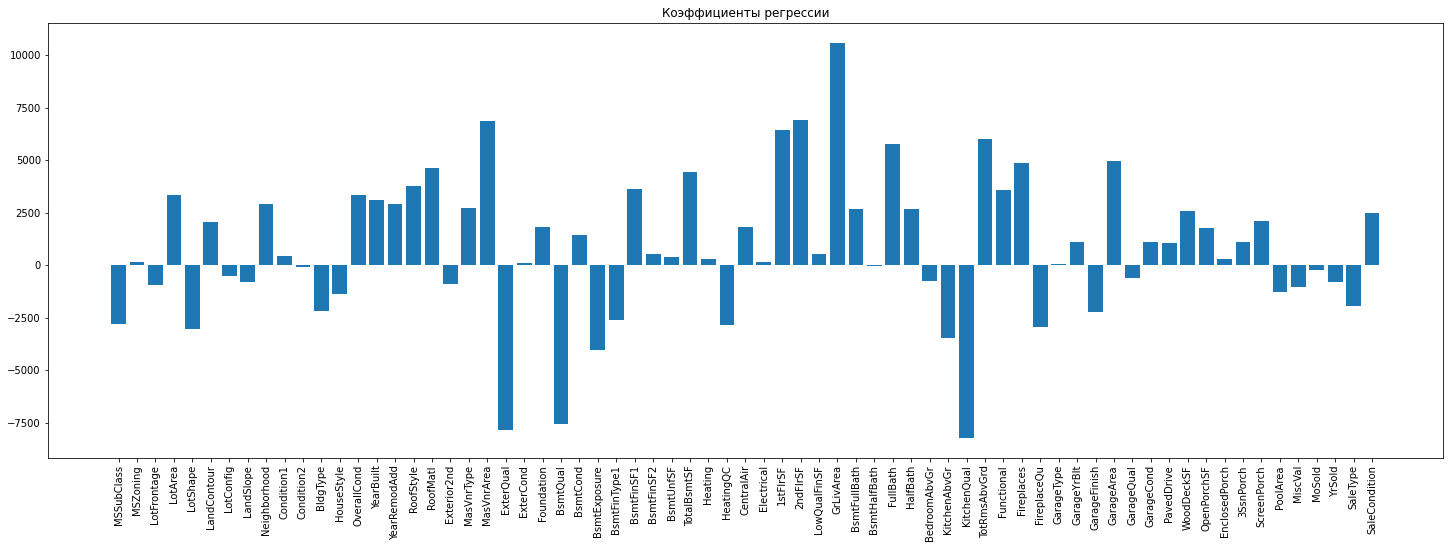

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))
labels = X.columns
plt.setp(ax.get_xticklabels(), rotation=90)
ax.bar(labels, reg_el.coef_)
plt.title('Коэффициенты регрессии')

### GS: Случайный лес для задачи регрессии

In [ ]:
param_grid = {
    'n_estimators': np.arange(10, 101, 5),
    'max_depth': [5, 7, 12],
    'min_samples_split': np.arange(4, 11, 2),
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
    }

gs_rf = GridSearchCV(RandomForestRegressor(), param_grid, verbose=2, n_jobs=-1)
gs_rf.fit(X_scaled, y)

print()
gs_rf.best_params_, gs_rf.best_score_

Fitting 5 folds for each of 2052 candidates, totalling 10260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1658 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2712 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 3700 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 4389 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 5646 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 7115 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 8046 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 10026 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 10260 out of 10260 | elapsed: 28.7min finished


({'max_depth': 12,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'min_samples_split': 6,
  'n_estimators': 20},
 0.8420498473239227)

Обучим модель на оптимальных параметрах из GS.
Выведем результат R^2 для тренировочной выборки (Train), средний R^2 кросс-валидации на всей выборке, результат R^2 для тестовой выборки (Test).
Поскольку результат Train значительно выше, чем Test, то можно сделать вывод о переобучении. 

Результат на тестовой выборке 0.8 получился ниже, чем для модели в дефолтными параметрами 0.8343, что говорит о том, что для нашей исходной разбивки Train/Test параметры из GS неоптимальны, однако, для данных в целом это может быть лучшим результатом.

In [ ]:
rf_reg = RandomForestRegressor(random_state=123, **gs_rf.best_params_)
rf_reg.fit(X_train, y_train)

rf_reg_train_score = rf_reg.score(X_train, y_train)
rf_reg_valid_score = np.mean(cross_val_score(rf_reg, X_scaled, y, cv=10))
rf_reg_test_score = rf_reg.score(X_test, y_test)

print('RandomForest \n',
      f'Train: {rf_reg_train_score}\n',
      f'Valid: {rf_reg_valid_score}\n',
      f'Test: {rf_reg_test_score}'
      )
print('MAE: %.2f' % (metrics.mean_absolute_error(y_test, rf_reg.predict(X_test))))

RandomForest 
 Train: 0.9584805829423407
 Valid: 0.8434253694965845
 Test: 0.8002028986620915
MAE: 17556.63


Посмотрим важность топ-20 признаков для модели Случайный лес.
Наиболее важными оказались: GrLivArea (жилая площадь), BsmQual (глубина подвала), YearBuilt (год постройки). 

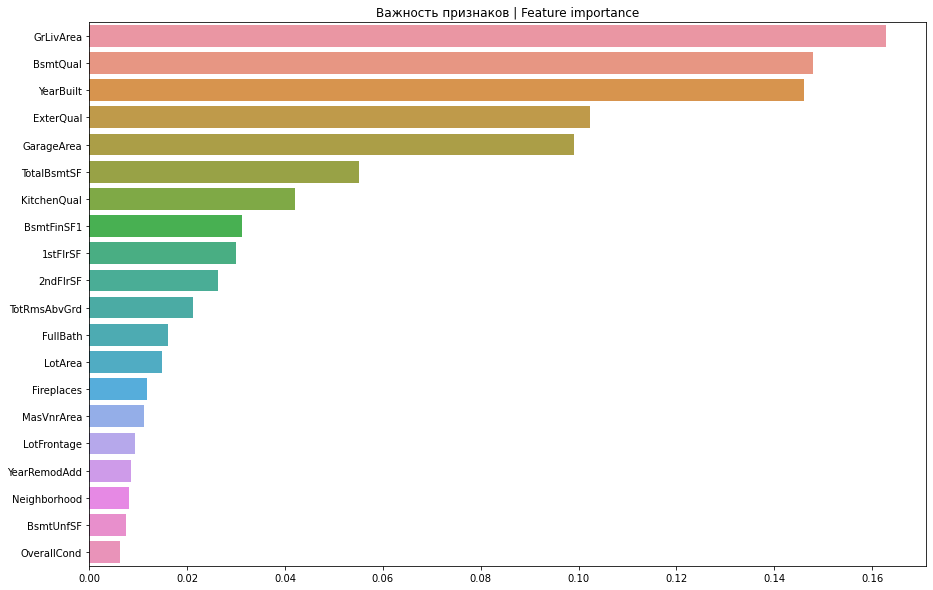

In [ ]:
def plot_feature_importances(model, columns, nr_f=10):         
    imp = pd.Series(data = model.feature_importances_, 
                    index=columns).sort_values(ascending=False)   
    plt.figure(figsize=(15,10))  
    plt.title("Важность признаков | Feature importance")  
    ax = sns.barplot(y=imp.index[:nr_f], x=imp.values[:nr_f], orient='h')

plot_feature_importances(rf_reg, X.columns, 20)

### GS: Градиентный бустинг для задачи регрессии

In [ ]:
param_grid = {
    'n_estimators': np.arange(100, 501, 100),
    'max_depth': [3, 6, 9],    
    'max_features': ['auto', 'sqrt', 'log2']
    }

gs_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid, verbose=2, n_jobs=-1)
gs_gbr.fit(X_scaled, y)

print()
gs_gbr.best_params_, gs_gbr.best_score_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  3.4min finished


({'max_depth': 3, 'max_features': 'auto', 'n_estimators': 300},
 0.8809313990309494)

Обучим модель на оптимальных параметрах из GS.
Выведем результат R^2 для тренировочной выборки (Train), средний R^2 кросс-валидации на всей выборке, результат R^2 для тестовой выборки (Test).
Поскольку результат Train значительно выше, чем Test, то можно сделать вывод о переобучении.

Результат на тестовой выборке 0.8262 получился выше, чем для модели в дефолтными параметрами 0.8180, это очень хорошо :)

In [ ]:
gbr = GradientBoostingRegressor(random_state=123, **gs_gbr.best_params_)
gbr.fit(X_train, y_train)

gbr_train_score = gbr.score(X_train, y_train)
gbr_valid_score = np.mean(cross_val_score(gbr, X_scaled, y, cv=10))
gbr_test_score = gbr.score(X_test, y_test)

print('GradientBoosting \n',
      f'Train: {gbr_train_score}\n',
      f'Valid: {gbr_valid_score}\n',
      f'Test: {gbr_test_score}'
      )
print('MAE: %.2f' % (metrics.mean_absolute_error(y_test, gbr.predict(X_test))))

GradientBoosting 
 Train: 0.9917102929722008
 Valid: 0.8716987061227062
 Test: 0.8262081241286287
MAE: 16582.56


###Выводим итоги:
Градиентный бустинг показал наилучший результат

In [ ]:
names = ['ElasticNet', 'Random Forest', 'GradientBoosting']
sample_types = ['Train', 'Valid', 'Test']
el_score = np.array([reg_el_train_score, reg_el_valid_score, reg_el_test_score])
rf_score = np.array([rf_reg_train_score, rf_reg_valid_score, rf_reg_test_score])
gb_score = np.array([gbr_train_score, gbr_valid_score, gbr_test_score])

scores_total = pd.DataFrame(np.transpose([el_score, rf_score, gb_score]), columns=names).set_index(pd.Index(sample_types))
scores_total

,ElasticNet,Random Forest,GradientBoosting
Train,0.827601,0.958481,0.991710
Valid,0.800033,0.843425,0.871699
Test,0.782654,0.800203,0.826208


#Сохранение 2 моделей на диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/'

'Colab Notebooks'   models	  'Нейронные сети (материалы)'
 datasets	    my_databases


In [ ]:
import joblib

def save_mod(model, model_name, path):
  file_name = f'{path}{model_name}.sav'
  joblib.dump(model, file_name)

In [ ]:
save_mod(rf_reg, 'Random_forest_reg', '/content/drive/My Drive/models/')
save_mod(gbr, 'GradientBoosting_reg', '/content/drive/My Drive/models/')

Тестирование загрузки моделей

In [ ]:
rf_reg_path = '/content/drive/My Drive/models/Random_forest_reg.sav'
gbr_path = '/content/drive/My Drive/models/GradientBoosting_reg.sav'

model1 = joblib.load(rf_reg_path)
model2 = joblib.load(gbr_path)

print(model1.score(X_test, y_test))
print(model2.score(X_test, y_test))


0.8002028986620915
0.8262081241286287


#Дополнительно: проверка моделей на тестовом датасете

In [ ]:
df_test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

display(df_test.head())
display(submission.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
df_test = pd.concat([df_test, submission['SalePrice']], axis=1)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


Всю предобработку данных, проведенную в ходе настоящего проекта, компануем в функцию

In [ ]:
def preproccessing_House_prices(df):
  columns_to_drop = ['Id', 
                     'Alley', 
                     'PoolQC', 
                     'MiscFeature', 
                     'Fence', 
                     'Street', 
                     'Utilities',
                     'OverallQual', 
                     'Exterior1st', 
                     'BsmtFinType2', 
                     'GarageCars'
                     ]
  # удаляем лишние признаки
  df.drop(columns=columns_to_drop, inplace=True)

  # формируем список категориальных признаков с пустыми значениями
  columns_object_with_NA = []
  for j in df.columns:
    if df.dtypes[j] == np.object and len(df[df[j].isnull()]) > 0:
      columns_object_with_NA.append(j)    
  
  # обрабатываем пустоты
  df[columns_object_with_NA] = df[columns_object_with_NA].fillna(value='None')
  #df.fillna(value=0.0, inplace=True)
  df.dropna(inplace=True)
  
  # кодируем категориальные признаки
  encoded_data, encoders = number_encode_features(df)

  # определяем X, y; нормализуем данные
  X = encoded_data.drop(['SalePrice'], axis=1)
  y = encoded_data['SalePrice']

  X_scaled = StandardScaler().fit_transform(X)

  return X_scaled, y

In [ ]:
X_test, y_test = preproccessing_House_prices(df_test)

In [ ]:
X_test.shape, y_test.shape

((1146, 69), (1146,))

In [ ]:
print(model2.score(X_test, y_test))

-26.97133164063777
